In [1]:
import numpy as np
from scipy import linalg
from LinRegg import LinRegg
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import random


In [2]:
def generatePm(num):
    allPmVal = []
    if num == 0:
        return allPmVal
    if num == 1:
        return [[1], [-1]]
    else:
        for pM in generatePm(num - 1):
            allPmVal.append([1] + pM)
            allPmVal.append([-1] + pM)
    return allPmVal

print(generatePm(3))

[[1, 1, 1], [-1, 1, 1], [1, -1, 1], [-1, -1, 1], [1, 1, -1], [-1, 1, -1], [1, -1, -1], [-1, -1, -1]]


In [3]:
#basicPrep
dataX = np.array([1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969])
dataY = np.array([4835, 4970, 5085, 5160, 5310, 5260, 5235, 5255, 5235, 5210, 5175])
#normalizing data and inserting it to the lier regression
dataX = dataX - np.average(dataX)
inputLst = []
#already standardized
for year in dataX:
    inputLst.append([year, year**2, year**3])
X = np.array(inputLst)
cubeRegg = LinRegg(X, dataY)

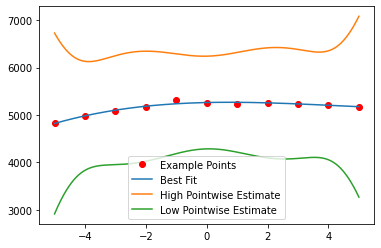

In [4]:
#pointwise confidence interval
#mean = bestFit
#variance = yVariance^2*x0^T*(X^TX)^(-1)*x0
cubeRegg.RSSSolve()
meanBest = cubeRegg.bestFit
yVariance = cubeRegg.approximateVariance()
xAxis = np.linspace(X[0][0], X[-1][0], 1000)
plt.plot(dataX, dataY, 'ro', label = "Example Points")
bestFitYAxis = np.ones(1000)*meanBest[0] + xAxis*meanBest[1] + xAxis**2*meanBest[2] + xAxis**3*meanBest[3]
plt.plot(xAxis, bestFitYAxis, label = "Best Fit")
pointwiseVar = []
X = cubeRegg.inputArray
matrix = linalg.inv(np.dot(X.transpose(), X))
for x in xAxis:
    fundamentalArray = np.array([1, x, x**2, x**3])
    pointwiseVar.append(np.sqrt(yVariance**2 * np.dot(fundamentalArray, np.dot(matrix, fundamentalArray))))
pointwiseVar = np.array(pointwiseVar)
highYPointwiseEstimate = bestFitYAxis + pointwiseVar*norm.ppf(0.975)
lowYPointwiseEstimate = bestFitYAxis + pointwiseVar*norm.ppf(0.025)
plt.plot(xAxis, highYPointwiseEstimate, label = "High Pointwise Estimate")
plt.plot(xAxis, lowYPointwiseEstimate, label = "Low Pointwise Estimate")
plt.legend()







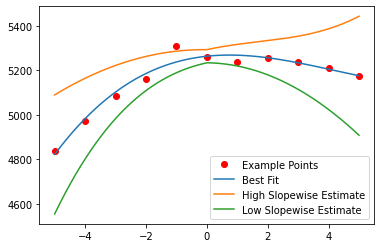

In [5]:
#conficence interval of the bestFit
#uses (3.14) equation
allPmVal = generatePm(len(meanBest))
allPossibleFunctions = np.zeros((len(allPmVal), len(meanBest)))
for ii in range(len(allPmVal)):
    for jj in range(len(meanBest)):
        allPossibleFunctions[ii][jj] = meanBest[jj] + allPmVal[ii][jj]*norm.ppf(0.975)*np.sqrt(matrix[jj][jj] * yVariance)
highYEstimate = []
lowYEstimate = []
for x in xAxis:
    allPossibleY = []
    for function in allPossibleFunctions:
        allPossibleY.append(function[0] + x*function[1] + x**2 * function[2] + x**3 * function[3])
    highYEstimate.append( max(allPossibleY))
    lowYEstimate.append(min(allPossibleY))
plt.plot(dataX, dataY, 'ro', label = "Example Points")
plt.plot(xAxis, bestFitYAxis, label = "Best Fit")
plt.plot(xAxis, highYEstimate, label = "High Slopewise Estimate")
plt.plot(xAxis, lowYEstimate, label = "Low Slopewise Estimate")
plt.legend()

In [7]:
#conclusion:

#confidence interval for the slopes produces a much narrower bound.